# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [6]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [7]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [8]:
df = df.drop(columns='timestamp')

In [9]:
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


In [10]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['uid', 'labname']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['uid', 'labname']))
encoded_df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Альтернативный вариант 
df = pd.get_dummies(df, columns=['uid', 'labname'], dtype='int')
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df.to_csv('../data/dayofweek.csv')

In [14]:
most_popular = df['dayofweek'].mode()[0]
accuracy_native = accuracy_score(df['dayofweek'], [most_popular] * len(df))
print(f'Accuracy of the native model: {accuracy_native * 100:.2f}%')

Accuracy of the native model: 23.49%


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [15]:
model = LogisticRegression(random_state=21, fit_intercept=False)

X = df.drop(columns='dayofweek')
y = df['dayofweek']

model.fit(X, y)
y_pred = model.predict(X)

score = accuracy_score(y, y_pred)
print(f'Accuracy of the model: {score * 100:.2f}%')

Accuracy of the model: 64.06%


In [16]:
pd.DataFrame(model.coef_)

# columns - X (features)
# rows - y (dayofweek)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.029706,0.060742,0.887855,-0.722041,-1.209618,-0.135506,0.118553,-0.242924,0.993158,-0.574370,...,0.887855,0.559050,0.560158,-0.343194,0.050205,-0.523393,-1.747894,-0.422551,-0.803889,0.227731
1,0.520633,-0.322071,-0.092215,-0.754495,0.478224,-0.071531,0.045304,1.872677,1.070649,-0.348605,...,-0.092215,-0.067600,-0.060694,-0.008029,0.005080,-0.754884,-1.235137,1.754113,1.382146,0.492415
2,0.644720,0.543219,-0.102669,-0.553443,1.531979,-0.179436,-0.437954,-0.789167,-1.999897,-0.422269,...,-0.102669,-0.026437,-0.023188,-0.512791,-0.187417,0.076019,-0.765157,-0.923292,1.650270,-0.089549
3,0.847089,-0.148051,-0.077951,2.079764,0.978925,-0.263650,0.122552,-1.066014,-1.895669,0.836701,...,-0.077951,-0.109452,-0.093234,-0.874854,-0.628207,0.140535,0.702804,0.579607,1.395373,1.677414
4,-0.808451,0.040166,-0.220369,-0.587152,-0.347626,-0.525120,-1.192528,-1.019025,-0.982025,-0.450843,...,-0.220369,-0.063324,-0.071402,-0.897463,-1.231017,-0.879798,0.822831,-1.679946,-1.985332,-0.784483
5,-0.795752,-0.019169,-0.219953,-0.648729,0.075317,-0.936193,-0.917360,0.513349,2.461771,-0.045063,...,-0.219953,-0.038542,-0.043516,0.395595,1.182763,0.067202,1.903114,-0.879109,-1.470127,-1.268375
6,-0.378532,-0.154836,-0.174698,1.186094,-1.507200,2.111436,2.261434,0.731104,0.352012,1.004449,...,-0.174698,-0.253694,-0.268123,2.240736,0.808592,1.874319,0.319439,1.571178,-0.168442,-0.255154


In [17]:
def plot_bar_h(coef, features, top_n=10):
    
    if coef.ndim == 1:
        importance = np.abs(coef)
    else:
        importance = np.sum(np.abs(coef), axis=0)

    sorted_indices = np.argsort(importance)[-top_n:]
    sorted_importance = importance[sorted_indices]
    sorted_features = features[sorted_indices]
    plt.barh(sorted_features, sorted_importance)


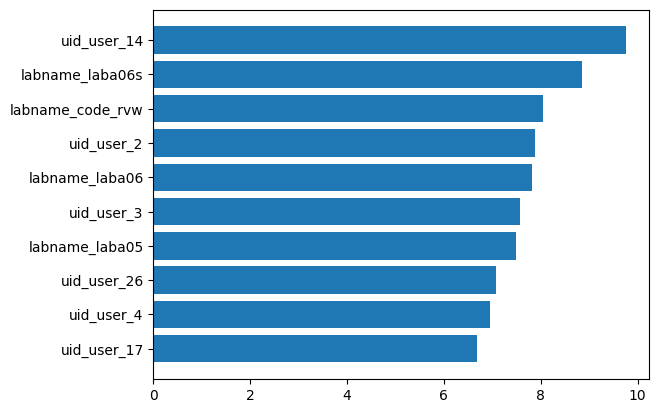

In [18]:
plot_bar_h(model.coef_, X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [19]:
svc = SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X, y)
y_pred = svc.predict(X)

score = accuracy_score(y, y_pred)
print(f'Accuracy of the model: {score * 100:.2f}%')

Accuracy of the model: 70.28%


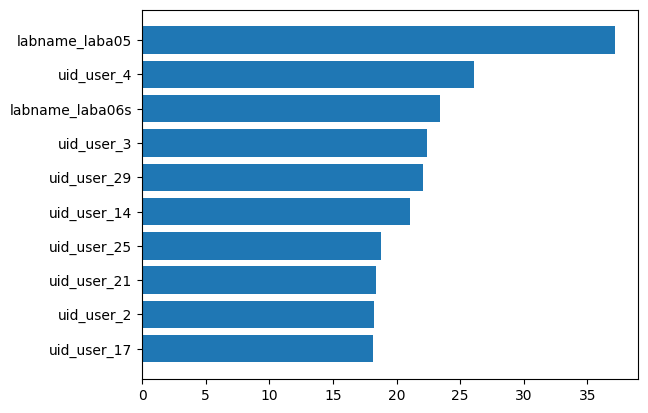

In [20]:
plot_bar_h(svc.coef_, X.columns)

In [21]:
model_scv = SVC(probability=True, random_state=21)
search_scv = GridSearchCV(estimator=model_scv, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}, scoring='accuracy')
search_scv.fit(X, y)
pred = search_scv.predict(X)
best = search_scv.best_params_['kernel']
score = accuracy_score(y, pred)
print(f'Best kernel - {best}: score = {score:.2f}%')

Best kernel - poly: score = 0.86%


### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [22]:
model_tree = DecisionTreeClassifier(max_depth=21, random_state=21)
model_tree.fit(X, y)

y_tree = model_tree.predict(X)

accuracy_score(y, y_tree)

0.9905100830367735

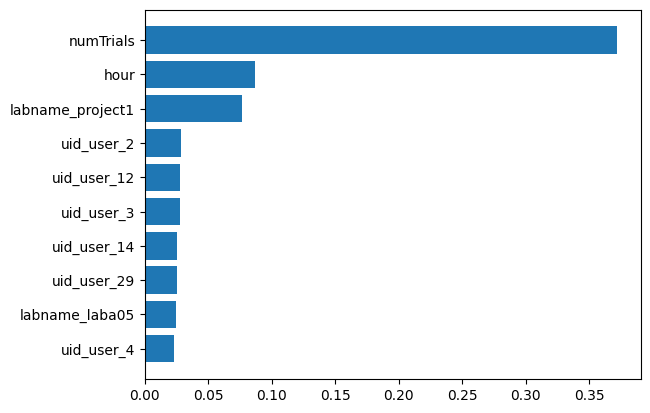

In [23]:
plot_bar_h(model_tree.feature_importances_, X.columns)

In [24]:
for i in range(3, 30, 3):
    model_tree = DecisionTreeClassifier(max_depth=i, random_state=21)
    model_tree.fit(X, y)
    y_tree = model_tree.predict(X)
    score = accuracy_score(y, y_tree)
    print(f'Score = {score:.4f} for depth {i}')

Score = 0.4899 for depth 3
Score = 0.6637 for depth 6
Score = 0.7847 for depth 9
Score = 0.8832 for depth 12
Score = 0.9460 for depth 15
Score = 0.9798 for depth 18
Score = 0.9905 for depth 21
Score = 0.9958 for depth 24
Score = 0.9988 for depth 27


### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [25]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model_forest.fit(X, y)
y_f = model_forest.predict(X)
accuracy_score(y, y_f)

1.0

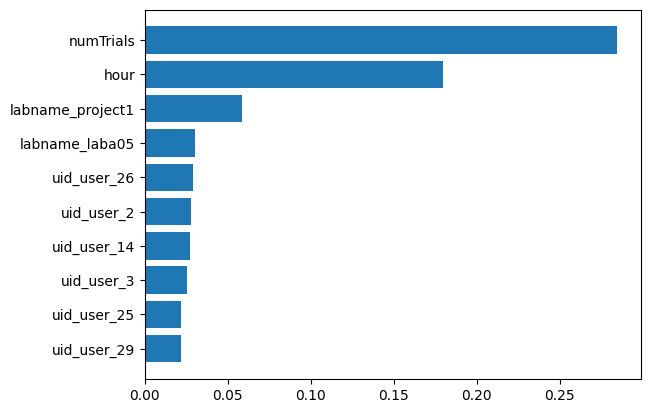

In [26]:
plot_bar_h(model_forest.feature_importances_, X.columns)

In [27]:
for depth in range(5, 26, 5):
    for estimators in range(50, 101, 50):
        model_forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=21)
        model_forest.fit(X, y)
        y_f = model_forest.predict(X)
        score = accuracy_score(y, y_f)
        print(f'Score = {score:.4f} for depth = {depth} and estimators = {estimators}')
    print('-' * 50)

Score = 0.5848 for depth = 5 and estimators = 50
Score = 0.5795 for depth = 5 and estimators = 100
--------------------------------------------------
Score = 0.8701 for depth = 10 and estimators = 50
Score = 0.8855 for depth = 10 and estimators = 100
--------------------------------------------------
Score = 0.9786 for depth = 15 and estimators = 50
Score = 0.9781 for depth = 15 and estimators = 100
--------------------------------------------------
Score = 0.9970 for depth = 20 and estimators = 50
Score = 0.9964 for depth = 20 and estimators = 100
--------------------------------------------------
Score = 1.0000 for depth = 25 and estimators = 50
Score = 1.0000 for depth = 25 and estimators = 100
--------------------------------------------------
